# Link Analysis
last updated; 9/22/2017

## Link budget
A link budget is accounting of all of the gains and losses from the transmitter, through the medium (free space, cable, waveguide, fiber, etc.) to the receiver in a telecommunication system. It accounts for the attenuation of the transmitted signal due to propagation, as well as the antenna gains, feedline and miscellaneous losses. Randomly varying channel gains such as fading are taken into account by adding some margin depending on the anticipated severity of its effects. The amount of margin required can be reduced by the use of mitigating techniques such as antenna diversity or frequency hopping.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Constants

In [2]:
c = 299.79E6    # Speed of light, m/s
k_dBm = -198.6  # Boltzmann's constant, dBm
To = 290        # Reference noise temperature, K

In [3]:
# Atmospheric Gaseous Losses
abs_wo = np.array([0, 0, 0, 0, 0, 0, 0, 0.001, 0.002, 0.004, 0.1, 0.2, 0.12, 0.11, 0.2, 0.6])
abs_oo = np.array([0, 0.001, 0.002, 0.003, 0.005, 0.008, 0.01, 0.012, 0.015, 0.016, 0.02, 0.021, 0.05, 10.5, 0.2, 0.15])
Freq = np.array([0.1, 0.2, 0.4, 0.6, 1, 2, 4, 6, 8, 10, 20, 22, 40, 60, 80, 100])

### Path loss elements

In [4]:
r_nmi = 69.588  # Range,nmi
r = r_nmi*1852  # convert nmi to meters
print('Path length: {:,.0f} m'.format(r))
f = 230e6       # Transmit frequency, Hz
Ls_dB = 20*np.log10(4*np.pi*r*f/c)   # Space loss
print('Space loss: {:.3f} dB'.format(Ls_dB))
La_dB = (np.interp(f/1e9, Freq, abs_oo) + np.interp(f/1e9, Freq, abs_wo))*r/1000      # Atmospheric loss, dB
print('Atmospheric loss: {:.3f} dB'.format(La_dB))
Lpt_dB = 5      # transmitter antenna pointing and polarization loss, dB
Lpr_dB = 0      # receiver antenna pointing and polarization loss, dB
Lp_dB = Ls_dB + La_dB + Lpt_dB + Lpr_dB  # Total path loss, dB
print('Total path loss: {:.3f} dB'.format(Lp_dB))

Path length: 128,877 m
Space loss: 121.886 dB
Atmospheric loss: 0.148 dB
Total path loss: 127.034 dB


### Transmitting terminal side

In [5]:
Pa = 5       # Power amplifier output, watts
Pa_dBm = 10*np.log10(Pa/.001)  # power out in dBm
print('Power amplifier output: {:.3f} dBm'.format(Pa_dBm))

Gt_dB = -15      # Transmit antenna gain, dB
Lt_dB = 1     # TX coupling loss, cable loss + connectors, dB
Lswr_dB = 0   # Transmit VSWR loss, dB
EIRP_dBm = Pa_dBm + Gt_dB - Lt_dB - Lswr_dB     # Effictive isotropic radiated power
print('Effictive isotropic radiated power: {:.3f} dBm'.format(EIRP_dBm))

Power amplifier output: 36.990 dBm
Effictive isotropic radiated power: 20.990 dBm


### Noise temperature calculations

In [6]:
Ta = 100     # antenna noise temperature, K
G1_dB = 18      # amps+cable+coupler+etc gains (losses), dB
F_rcvr_dB = 8   # rcvr noise figure, dB

G1 = 10**(G1_dB/10)  # from above non-dB
G1_NF = 5.068     # cascade noise figure, dB

T_rcvr = (10**(F_rcvr_dB/10) -1)*To   # receiver noise temperature
T_G1 = (10**(G1_NF/10)-1)*To + Ta  # amps+cable+coupler+etc cascade noise temp
Ts = T_G1 * G1 + T_rcvr    # System noise temp
print('System noise temp: {:,.1f} K'.format(Ts))

System noise temp: 48,327.3 K


### Receiving terminal side

In [7]:
Pr_dBm = EIRP_dBm - Lp_dB  #RX signal power at antenna
print('RX signal power at antenna: {:.3f} dBm'.format(Pr_dBm))

Gr_dB = 18      # Receiver antenna gain, dB
C_dBm = Pr_dBm + Gr_dB + G1_dB     #received carrier power
print('Received carrier power: {:.3f} dBm'.format(C_dBm))

RX signal power at antenna: -106.044 dBm
Received carrier power: -70.044 dBm


### Calculate SNR & Eb/No

In [8]:
Rb = 640e3     # Transmitted bit rate
No_dBm = k_dBm + 10*np.log10(Ts)
print('Noise spectral density: {:.3f} dBm/Hz'.format(No_dBm))
CNR_dB = C_dBm - No_dBm
print('carrier to noise ratio: {:.3f} dB/Hz'.format(CNR_dB))
EbNo_dB = CNR_dB - 10*np.log10(Rb)
print('Eb/No: {:.1f} dB'.format(EbNo_dB))

Noise spectral density: -151.758 dBm/Hz
carrier to noise ratio: 81.714 dB/Hz
Eb/No: 23.7 dB


### Calculate link margin

In [9]:
Iloss_dB = 0         # Implementation loss, dB
mid_imp_dB = 0       # Mitigation improvement, dB
req_EbNo_dB = 11.8   # required EbNo for BER, dB
req_margin_dB = 12    # Required link margin, dB

Surplus_dB = EbNo_dB-Iloss_dB+mid_imp_dB-req_EbNo_dB-req_margin_dB
print('Surpluso: {:.1f} dB'.format(Surplus_dB))

Surpluso: -0.1 dB


In [10]:
#### plot absorption

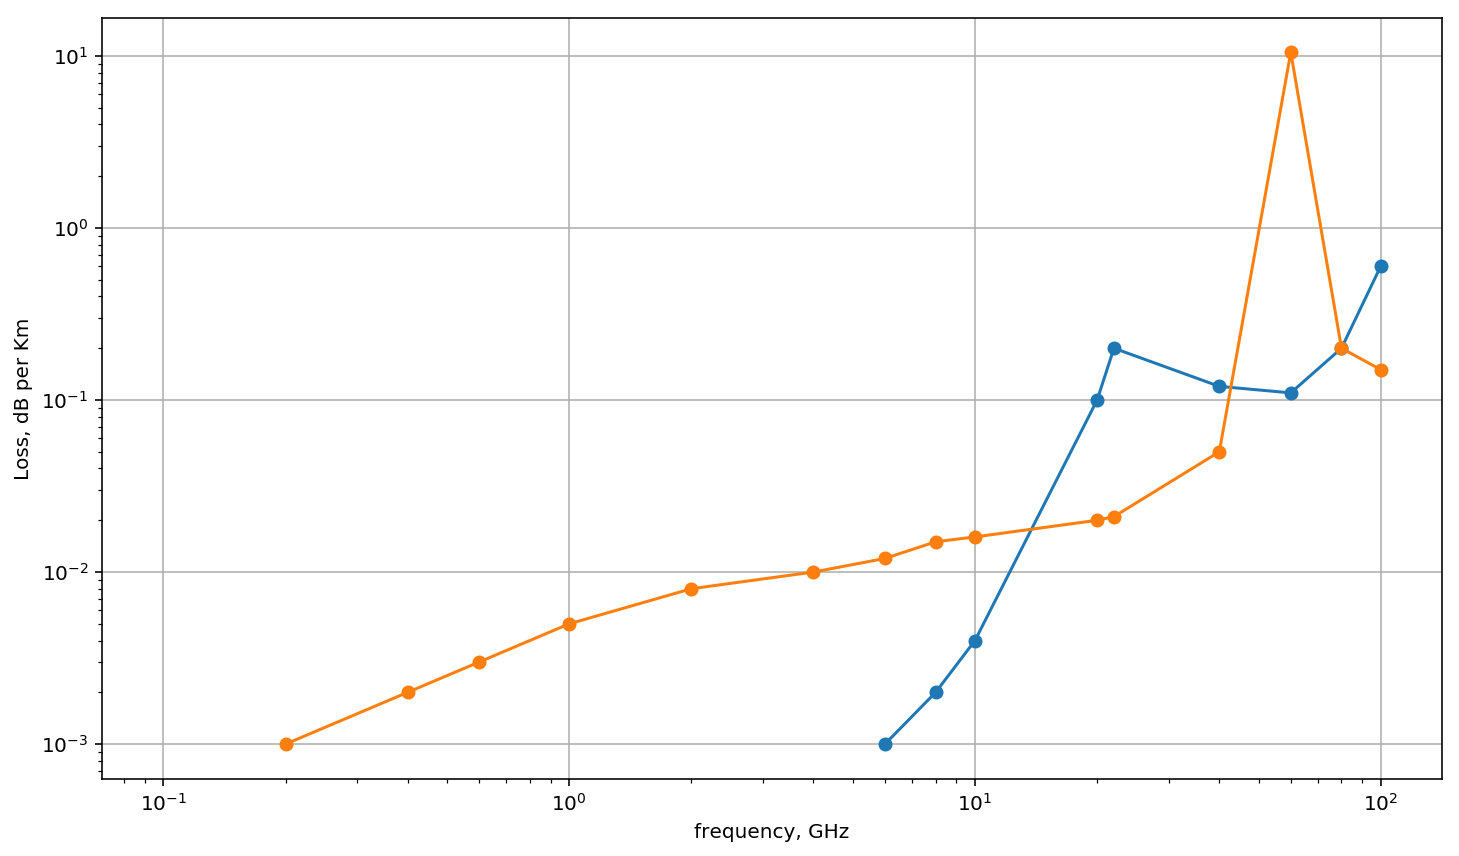

In [11]:
#plt.plot(Freq, abs_wo,'-o')
#plt.plot(Freq, abs_oo,'-o')
plt.loglog(Freq, abs_wo,'-o')
plt.loglog(Freq, abs_oo,'-o')
plt.xlabel('frequency, GHz')
plt.ylabel('Loss, dB per Km')
plt.grid()
plt.show()